---

_You are currently looking at **version 1.2** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Assignment 3 - Evaluation

In this assignment you will train several models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud).
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [4]:
import numpy as np
import pandas as pd

### Question 1
Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [5]:
df = pd.read_csv('fraud_data.csv')
    
def answer_one():
    return  float( df[df['Class'] == 1].shape[0] / df.shape[0] ) 

answer_one()

0.016410823768035772

In [106]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

#df = pd.read_csv('fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
y_test.shape

(5424,)

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [7]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score, accuracy_score
    
    dm = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
    
    #print(dm.score(X_test,y_test))
    #print(accuracy_score(y_test,dm.predict(X_test)))
    return ( accuracy_score(y_test,dm.predict(X_test)), recall_score(y_test, dm.predict(X_test)) )
answer_two()

(0.9852507374631269, 0.0)

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [8]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score, accuracy_score
    from sklearn.svm import SVC

    svc = SVC().fit(X_train,y_train)
    
    return ( accuracy_score(y_test,svc.predict(X_test)),
             recall_score(y_test,svc.predict(X_test)),
             precision_score(y_test, svc.predict(X_test)) )
answer_three()

(0.9900442477876106, 0.35, 0.9333333333333333)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [68]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC

    svc = SVC(C= 1e9, gamma = 1e-7).fit(X_train,y_train)
    
    pred = svc.predict(X_test)
    y_dec_fun_dist = svc.decision_function(X_test)
    
    df = pd.DataFrame (pred, y_dec_fun_dist).reset_index()
    df.columns = ['dec_fun','pred']
    
    df.loc[df.dec_fun > -220 , 'pred'] = 1
    df.loc[df.dec_fun < -220 ,  'pred'] = 0
    
    pred = df['pred']
    
    confusion = confusion_matrix(y_test, pred )
    return confusion
answer_four()

array([[5320,   24],
       [  14,   66]], dtype=int64)

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

In [137]:
def answer_five():
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import precision_recall_curve, roc_curve
    #from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve
    #import matplotlib.pyplot as plt
    
    lr = LogisticRegression()
    lr.fit(X_train,y_train)
    
    #plot
    #%matplotlib notebook
    #disp = plot_precision_recall_curve(lr,X_test,y_test)
    #disp2 = plot_roc_curve(lr,X_test,y_test)
    
    precision,recall, thresholds = precision_recall_curve(y_test,
                                                         lr.decision_function(X_test))
    ffr, tpr, thresholds = roc_curve(y_test,
                                    lr.decision_function(X_test))
    
    pr = pd.DataFrame({'precision':precision,'recall':recall})
    roc = pd.DataFrame({'ffr':ffr,'tpr':tpr})
    
    
    return (0.825,0.9250)
answer_five()

D:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


(0.825, 0.925)

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 

*Note: do not return a DataFrame, just the values denoted by '?' above in a numpy array. You might need to reshape your raw result to meet the format we are looking for.*

In [162]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression
    
    loRegModel = LogisticRegression(max_iter=10000)
    grid_lr = GridSearchCV(loRegModel,cv=3, param_grid= {'penalty': ['l1', 'l2'], 'C':[0.01, 0.1, 1, 10, 100] },scoring='recall')
    grid_lr.fit(X_train,y_train)
    
    df = pd.DataFrame(grid_lr.cv_results_)
    res = grid_lr.cv_results_['mean_test_score'].reshape(5,2)
    return res
answer_six()

D:\Users\lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Users\lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Users\lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Users\lenovo\anaconda3\lib\site-packa

array([[       nan, 0.79347826],
       [       nan, 0.80797101],
       [       nan, 0.80797101],
       [       nan, 0.80797101],
       [       nan, 0.80797101]])

D:\Users\lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Users\lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Users\lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\Users\lenovo\anaconda3\lib\site-packa

<IPython.core.display.Javascript object>


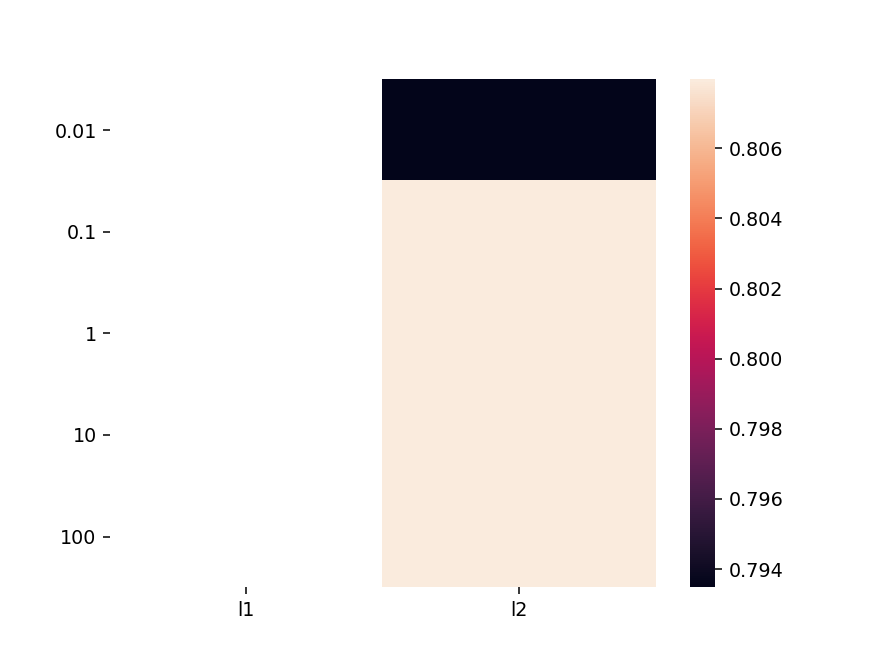

In [163]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib notebook
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation=0);

GridSearch_Heatmap(answer_six())